In [1]:
import pandas as pd

In [2]:
import random

In [3]:
import json

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
with open('offering.txt', 'r') as handle:
    json_data_offering = [json.loads(line) for line in handle]

In [5]:
#unnest dictionary !make a function and outside notebook
list_offering=[]

In [6]:
#put this function outside notebook!!!
def unnest_dict(list_of_nested_dict):
    '''
    helping function to unnest nested dictionaries from a list of dictioanries to list of dictioaniries
    '''
    
    list_unnested_dict=[]

    for i, _ in enumerate(list_of_nested_dict):
        
        dict_unnested = dict()
        
        for key1, val1 in list_of_nested_dict[i].items():
            
            if isinstance(val1, dict): #if nested dictionary
                
                for key2, val2 in val1.items(): 
                    
                    dict_unnested[key1+'_'+key2] = val2
                    
            else:
                
                dict_unnested[key1] = val1
                
        list_unnested_dict.append(dict_unnested)
        
    return list_unnested_dict

In [7]:
list_offering = unnest_dict(json_data_offering)

In [8]:
list_offering

[{'hotel_class': 4.0,
  'region_id': 60763,
  'url': 'http://www.tripadvisor.com/Hotel_Review-g60763-d113317-Reviews-Casablanca_Hotel_Times_Square-New_York_City_New_York.html',
  'phone': '',
  'details': None,
  'address_region': 'NY',
  'address_street-address': '147 West 43rd Street',
  'address_postal-code': '10036',
  'address_locality': 'New York City',
  'type': 'hotel',
  'id': 113317,
  'name': 'Casablanca Hotel Times Square'},
 {'hotel_class': 5.0,
  'region_id': 32655,
  'url': 'http://www.tripadvisor.com/Hotel_Review-g32655-d76049-Reviews-Four_Seasons_Hotel_Los_Angeles_at_Beverly_Hills-Los_Angeles_California.html',
  'phone': '',
  'details': None,
  'address_region': 'CA',
  'address_street-address': '300 S Doheny Dr',
  'address_postal-code': '90048',
  'address_locality': 'Los Angeles',
  'type': 'hotel',
  'id': 76049,
  'name': 'Four Seasons Hotel Los Angeles at Beverly Hills'},
 {'hotel_class': 3.5,
  'region_id': 60763,
  'url': 'http://www.tripadvisor.com/Hotel_Revi

In [9]:
json_data_offering

[{'hotel_class': 4.0,
  'region_id': 60763,
  'url': 'http://www.tripadvisor.com/Hotel_Review-g60763-d113317-Reviews-Casablanca_Hotel_Times_Square-New_York_City_New_York.html',
  'phone': '',
  'details': None,
  'address': {'region': 'NY',
   'street-address': '147 West 43rd Street',
   'postal-code': '10036',
   'locality': 'New York City'},
  'type': 'hotel',
  'id': 113317,
  'name': 'Casablanca Hotel Times Square'},
 {'hotel_class': 5.0,
  'region_id': 32655,
  'url': 'http://www.tripadvisor.com/Hotel_Review-g32655-d76049-Reviews-Four_Seasons_Hotel_Los_Angeles_at_Beverly_Hills-Los_Angeles_California.html',
  'phone': '',
  'details': None,
  'address': {'region': 'CA',
   'street-address': '300 S Doheny Dr',
   'postal-code': '90048',
   'locality': 'Los Angeles'},
  'type': 'hotel',
  'id': 76049,
  'name': 'Four Seasons Hotel Los Angeles at Beverly Hills'},
 {'hotel_class': 3.5,
  'region_id': 60763,
  'url': 'http://www.tripadvisor.com/Hotel_Review-g60763-d99352-Reviews-Hilton_

In [10]:
#df_offering = pd.DataFrame(columns=list_offering[0].keys())

In [11]:
df_offering = pd.DataFrame()

In [12]:
df_offering 

Empty DataFrame
Columns: []
Index: []

In [13]:
for _ in list_offering:
    df_offering = df_offering.append(_, ignore_index=True)

In [14]:
df_offering.phone.value_counts()

    4333
Name: phone, dtype: int64

In [15]:
df_offering 

address_locality address_postal-code address_region  \
0       New York City               10036             NY   
1         Los Angeles               90048             CA   
2       New York City               10019             NY   
3       New York City               10019             NY   
4       New York City               10036             NY   
...               ...                 ...            ...   
4328    Washington DC               20037             DC   
4329    Washington DC               20007             DC   
4330    Washington DC               20037             DC   
4331    Washington DC               20005             DC   
4332    Washington DC               20006             DC   

         address_street-address details  hotel_class        id  \
0          147 West 43rd Street    None          4.0  113317.0   
1               300 S Doheny Dr    None          5.0   76049.0   
2             790 Eighth Avenue    None          3.5   99352.0   
3          152 West 51st Street    None          4.0   93589.0   
4          130 West 46th Street    None          4.0  217616.0   
...                         ...     ...          ...       ...   
4328        1201 24th Street NW    None          5.0   84090.0   
4329  2800 Pennsylvania Ave. NW    None          5.0   84065.0   
4330           2121 P Street NW    None          4.0   84093.0   
4331         806 15th Street NW    None          4.5  235513.0   
4332           16th & H Sts. NW    None          5.0   84117.0   

                                                 name phone  region_id   type  \
0                       Casablanca Hotel Times Square          60763.0  hotel   
1     Four Seasons Hotel Los Angeles at Beverly Hills          32655.0  hotel   
2                      Hilton Garden Inn Times Square          60763.0  hotel   
3                              The Michelangelo Hotel          60763.0  hotel   
4                             The Muse Hotel New York          60763.0  hotel   
...                                               ...   ...        ...    ...   
4328                            Park Hyatt Washington          28970.0  hotel   
4329                     Four Seasons Washington D.C.          28970.0  hotel   
4330           Palomar Washington DC, a Kimpton Hotel          28970.0  hotel   
4331                            Sofitel Washington DC          28970.0  hotel   
4332                                    The Hay-Adams          28970.0  hotel   

                                                    url  
0     http://www.tripadvisor.com/Hotel_Review-g60763...  
1     http://www.tripadvisor.com/Hotel_Review-g32655...  
2     http://www.tripadvisor.com/Hotel_Review-g60763...  
3     http://www.tripadvisor.com/Hotel_Review-g60763...  
4     http://www.tripadvisor.com/Hotel_Review-g60763...  
...                                                 ...  
4328  http://www.tripadvisor.com/Hotel_Review-g28970...  
4329  http://www.tripadvisor.com/Hotel_Review-g28970...  
4330  http://www.tripadvisor.com/Hotel_Review-g28970...  
4331  http://www.tripadvisor.com/Hotel_Review-g28970...  
4332  http://www.tripadvisor.com/Hotel_Review-g28970...  

[4333 rows x 12 columns]

In [17]:
df_offering.address_locality.value_counts()

New York City    435
Houston          428
San Antonio      343
Los Angeles      296
San Diego        245
San Francisco    236
Dallas           186
Austin           185
Indianapolis     183
Phoenix          178
Charlotte        166
Chicago          165
Columbus         140
Denver           140
Jacksonville     131
Memphis          129
Washington DC    125
Seattle          121
Fort Worth        97
Philadelphia      81
El Paso           77
Boston            75
San Jose          70
Baltimore         69
Detroit           32
Name: address_locality, dtype: int64

## reviews

In [18]:
with open('review.txt', 'r') as handle:
    json_data_reviews = [json.loads(line) for line in handle]

In [19]:
json_data_reviews

[{'ratings': {'service': 5.0,
   'cleanliness': 5.0,
   'overall': 5.0,
   'value': 5.0,
   'location': 5.0,
   'sleep_quality': 5.0,
   'rooms': 5.0},
  'title': '“Truly is "Jewel of the Upper Wets Side"”',
  'text': 'Stayed in a king suite for 11 nights and yes it cots us a bit but we were happy with the standard of room, the location and the friendliness of the staff. Our room was on the 20th floor overlooking Broadway and the madhouse of the Fairway Market. Room was quite with no noise evident from the hallway or adjoining rooms. It was great to be able to open windows when we craved fresh rather than heated air. The beds, including the fold out sofa bed, were comfortable and the rooms were cleaned well. Wi-fi access worked like a dream with only one connectivity issue on our first night and this was promptly responded to with a call from the service provider to ensure that all was well. The location close to the 72nd Street subway station is great and the complimentary umbrellas o

In [20]:
random.seed(41)
json_data_reviews_smaller = random.sample(json_data_reviews, 10000)

In [21]:
json_data_reviews_smaller

[{'ratings': {'service': 2.0,
   'cleanliness': 4.0,
   'overall': 3.0,
   'value': 4.0,
   'rooms': 2.0,
   'check_in_front_desk': 4.0,
   'location': 2.0},
  'title': '“Nice Hotel Centrally Located”',
  'text': 'I recently stayed here for two nights while in town for a conference. Check in was smooth and took about 5 minutes. I was surprised to learn that the clerk gave me a room with a view of City Hall. Well what that meant was you have a room that borders a very busy street. I felt like I was trying to sleep at a Nascar event. If you stay here make sure you get a room that faces away from City Hall.\nI received my receipt under the door in the morning and it had a food charge for $75 which was not mine. I brought it to the attention of the checkout desk and I was told that they would need to research it out with the restaurant manager. I guess guilty until proven innocent. They have subsequently removed it from my bill. I still do not appreciate the inconvenience.\nThe hotel over 

In [23]:
list_reviews_smaller = unnest_dict(json_data_reviews_smaller)

In [24]:
json_data_reviews_smaller

[{'ratings': {'service': 2.0,
   'cleanliness': 4.0,
   'overall': 3.0,
   'value': 4.0,
   'rooms': 2.0,
   'check_in_front_desk': 4.0,
   'location': 2.0},
  'title': '“Nice Hotel Centrally Located”',
  'text': 'I recently stayed here for two nights while in town for a conference. Check in was smooth and took about 5 minutes. I was surprised to learn that the clerk gave me a room with a view of City Hall. Well what that meant was you have a room that borders a very busy street. I felt like I was trying to sleep at a Nascar event. If you stay here make sure you get a room that faces away from City Hall.\nI received my receipt under the door in the morning and it had a food charge for $75 which was not mine. I brought it to the attention of the checkout desk and I was told that they would need to research it out with the restaurant manager. I guess guilty until proven innocent. They have subsequently removed it from my bill. I still do not appreciate the inconvenience.\nThe hotel over 

In [25]:
list_reviews_smaller

[{'ratings_service': 2.0,
  'ratings_cleanliness': 4.0,
  'ratings_overall': 3.0,
  'ratings_value': 4.0,
  'ratings_rooms': 2.0,
  'ratings_check_in_front_desk': 4.0,
  'ratings_location': 2.0,
  'title': '“Nice Hotel Centrally Located”',
  'text': 'I recently stayed here for two nights while in town for a conference. Check in was smooth and took about 5 minutes. I was surprised to learn that the clerk gave me a room with a view of City Hall. Well what that meant was you have a room that borders a very busy street. I felt like I was trying to sleep at a Nascar event. If you stay here make sure you get a room that faces away from City Hall.\nI received my receipt under the door in the morning and it had a food charge for $75 which was not mine. I brought it to the attention of the checkout desk and I was told that they would need to research it out with the restaurant manager. I guess guilty until proven innocent. They have subsequently removed it from my bill. I still do not appreciat

In [26]:
df_reviews_smaller = pd.DataFrame()

In [27]:
for _ in list_reviews_smaller:
    df_reviews_smaller = df_reviews_smaller.append(_, ignore_index=True)

In [28]:
df_reviews_smaller

author_id            author_location  \
0     2E4442B5FF4C485F4EF4FD49B66AD171                Raleigh, NC   
1     25F3E453887C8931BFDC476D5649FB66                GAINESVILLE   
2                                                                   
3     65871927F626F1727B8FC071B50E6235                              
4     EA5653024E9F4B232D73C1959A503FBC  Sunderland, Massachusetts   
...                                ...                        ...   
9995  2F6BC8BA776F19982DD6A5778FCACEE8            Tucson, Arizona   
9996  B7FC51EAB233E4C38D4DD73EC69FC582         Caracas, Venezuela   
9997  E901F2EA1DE0E3116BC2BA39B6471641        Baltimore, Maryland   
9998  FEC5FF51A19E17FD3BE307BD1AB2D7DD            Cleveland, Ohio   
9999  8078C467EC1A031453E82D00A5A007FF                 Cincinnati   

      author_num_cities  author_num_helpful_votes  author_num_reviews  \
0                  10.0                      32.0                16.0   
1                  12.0                      14.0                15.0   
2                   NaN                       NaN                 NaN   
3                  30.0                     110.0                62.0   
4                   5.0                       2.0                 6.0   
...                 ...                       ...                 ...   
9995               10.0                       1.0                11.0   
9996                9.0                       3.0                35.0   
9997                NaN                       NaN                 1.0   
9998                NaN                       NaN                 1.0   
9999                6.0                       1.0                13.0   

      author_num_type_reviews    author_username                date  \
0                        14.0            shaniz1       July 11, 2008   
1                        15.0  RobertGainesville    January 31, 2011   
2                         NaN                        August 25, 2008   
3                        40.0             ehjott  September 28, 2007   
4                         NaN          Krish3107     August 23, 2012   
...                       ...                ...                 ...   
9995                      8.0          Judith050    December 9, 2011   
9996                      5.0          Ileana207  September 13, 2012   
9997                      NaN                C S   February 28, 2012   
9998                      NaN             Tony D    October 10, 2012   
9999                      7.0          schmidthb   December 14, 2011   

         date_stayed           id  ...  ratings_location  ratings_overall  \
0          July 2008   17784086.0  ...               2.0              3.0   
1      December 2010   95126489.0  ...               5.0              5.0   
2                NaN   19636945.0  ...               NaN              4.0   
3      February 2006   10014646.0  ...               4.0              3.0   
4        August 2012  138146189.0  ...               5.0              4.0   
...              ...          ...  ...               ...              ...   
9995   November 2011  121563209.0  ...               4.0              5.0   
9996  September 2012  140207729.0  ...               5.0              4.0   
9997   February 2012  125348871.0  ...               5.0              5.0   
9998  September 2012  142512109.0  ...               4.0              1.0   
9999   December 2011  121733486.0  ...               4.0              4.0   

      ratings_rooms  ratings_service  ratings_value  \
0               2.0              2.0            4.0   
1               4.0              5.0            4.0   
2               3.0              4.0            NaN   
3               2.0              4.0            3.0   
4               4.0              4.0            3.0   
...             ...              ...            ...   
9995            5.0              5.0            5.0   
9996            4.0              5.0            4.0   
9997            5.0              5.0  

In [29]:
# 

In [32]:
df_reviews_smaller.offering_id[0]

102463.0

In [34]:
df_offering.columns

Index(['address_locality', 'address_postal-code', 'address_region',
       'address_street-address', 'details', 'hotel_class', 'id', 'name',
       'phone', 'region_id', 'type', 'url'],
      dtype='object')

# Clean data, delete null rows, only usefull columns

In [ ]:
#df_reviews_smaller.merge(df_offering, left_on='offering_id', right_on='id')

In [35]:
df_offering = df_offering.rename(columns={'id': 'offering_id'})
df_offering

address_locality address_postal-code address_region  \
0       New York City               10036             NY   
1         Los Angeles               90048             CA   
2       New York City               10019             NY   
3       New York City               10019             NY   
4       New York City               10036             NY   
...               ...                 ...            ...   
4328    Washington DC               20037             DC   
4329    Washington DC               20007             DC   
4330    Washington DC               20037             DC   
4331    Washington DC               20005             DC   
4332    Washington DC               20006             DC   

         address_street-address details  hotel_class  offering_id  \
0          147 West 43rd Street    None          4.0     113317.0   
1               300 S Doheny Dr    None          5.0      76049.0   
2             790 Eighth Avenue    None          3.5      99352.0   
3          152 West 51st Street    None          4.0      93589.0   
4          130 West 46th Street    None          4.0     217616.0   
...                         ...     ...          ...          ...   
4328        1201 24th Street NW    None          5.0      84090.0   
4329  2800 Pennsylvania Ave. NW    None          5.0      84065.0   
4330           2121 P Street NW    None          4.0      84093.0   
4331         806 15th Street NW    None          4.5     235513.0   
4332           16th & H Sts. NW    None          5.0      84117.0   

                                                 name phone  region_id   type  \
0                       Casablanca Hotel Times Square          60763.0  hotel   
1     Four Seasons Hotel Los Angeles at Beverly Hills          32655.0  hotel   
2                      Hilton Garden Inn Times Square          60763.0  hotel   
3                              The Michelangelo Hotel          60763.0  hotel   
4                             The Muse Hotel New York          60763.0  hotel   
...                                               ...   ...        ...    ...   
4328                            Park Hyatt Washington          28970.0  hotel   
4329                     Four Seasons Washington D.C.          28970.0  hotel   
4330           Palomar Washington DC, a Kimpton Hotel          28970.0  hotel   
4331                            Sofitel Washington DC          28970.0  hotel   
4332                                    The Hay-Adams          28970.0  hotel   

                                                    url  
0     http://www.tripadvisor.com/Hotel_Review-g60763...  
1     http://www.tripadvisor.com/Hotel_Review-g32655...  
2     http://www.tripadvisor.com/Hotel_Review-g60763...  
3     http://www.tripadvisor.com/Hotel_Review-g60763...  
4     http://www.tripadvisor.com/Hotel_Review-g60763...  
...                                                 ...  
4328  http://www.tripadvisor.com/Hotel_Review-g28970...  
4329  http://www.tripadvisor.com/Hotel_Review-g28970...  
4330  http://www.tripadvisor.com/Hotel_Review-g28970...  
4331  http://www.tripadvisor.com/Hotel_Review-g28970...  
4332  http://www.tripadvisor.com/Hotel_Review-g28970...  

[4333 rows x 12 columns]

In [36]:
df_union = pd.merge(df_reviews_smaller, df_offering, on=["offering_id"])

In [37]:
df_union

author_id           author_location  \
0     2E4442B5FF4C485F4EF4FD49B66AD171               Raleigh, NC   
1     556A4A70DCA457DE95FD95B9CE217014             Nashville, TN   
2     8D6ECB2EB034591EF86E540319D24992                  New York   
3     DDCEA80A1BFE32D8C91EFE473737A229                  New York   
4     19568376B8C1295886B69B322E4C6055  Harrisburg, Pennsylvania   
...                                ...                       ...   
9995  61B3197983D553C6CCC12D3C265E4375                    Mexico   
9996  9CE843F2646875FCB4EE774CAB6FCB68         Detroit, Michigan   
9997  7BFD165584BDE13CBD73A9AF1C1B2BF7                    Austin   
9998  7B5194085DEE03D4FCC5589C6353D683                near Liège   
9999  272B925B62D0EFEB4D140429132A5A4E             Arlington, TX   

      author_num_cities  author_num_helpful_votes  author_num_reviews  \
0                  10.0                      32.0                16.0   
1                   5.0                       2.0                12.0   
2                  13.0                      55.0                21.0   
3                  34.0                      74.0                50.0   
4                  10.0                       3.0                11.0   
...                 ...                       ...                 ...   
9995               19.0                      18.0                30.0   
9996               31.0                      25.0                55.0   
9997                9.0                      11.0                17.0   
9998                5.0                       6.0                 5.0   
9999               16.0                       7.0                26.0   

      author_num_type_reviews  author_username               date  \
0                        14.0          shaniz1      July 11, 2008   
1                         5.0     Grumpylicous     August 4, 2012   
2                        20.0      AA-Platinum  November 21, 2006   
3                        14.0        DavidTrip    August 12, 2009   
4                         7.0    unclesamspad2       May 30, 2009   
...                       ...              ...                ...   
9995                     28.0  AlejandraMexico       May 10, 2009   
9996                     22.0       mjwingfans       July 3, 2010   
9997                      9.0       AustinBarb  December 30, 2011   
9998                      5.0          elpelso      March 5, 2008   
9999                     15.0      kikiwhite69  December 17, 2008   

         date_stayed           id  ...  address_postal-code  address_region  \
0          July 2008   17784086.0  ...                19107              PA   
1     September 2011  136233716.0  ...                19107              PA   
2      November 2006    6161247.0  ...                19107              PA   
3        August 2009   37482297.0  ...                19107              PA   
4           May 2009   31138794.0  ...                19107              PA   
...              ...          ...  ...                  ...             ...   
9995        May 2009   29721005.0  ...                78258              TX   
9996        May 2010   69543852.0  ...                46250              IN   
9997   December 2011  122265474.0  ...                78216              TX   
9998      March 2008   14063603.0  ...                77003              TX   
9999   December 2008   22793964.0  ...           77098-4502              TX   

        address_street-address  details  hotel_class  \
0          21 N Juniper Street     None          3.0   
1          21 N Juniper Street     None          3.0   
2          21 N Juniper Street     None          3.0   
3          21 N Juniper Street     None          3.0   
4          21 N Juniper Street     None          3.0   
...                        ...      ...          ...   
9995  125 North Loop 1604 West     None          3.0   
9996       6817 E. 82nd Street     None          2.5   
9997        850 Halm Boulevard     None          2.5 

In [39]:
df_smaller = df_union.loc[:,['offering_id', 'name', 'address_locality', 'ratings_overall', 'text', 'title']]

In [38]:
df_union.columns

Index(['author_id', 'author_location', 'author_num_cities',
       'author_num_helpful_votes', 'author_num_reviews',
       'author_num_type_reviews', 'author_username', 'date', 'date_stayed',
       'id', 'num_helpful_votes', 'offering_id', 'ratings_check_in_front_desk',
       'ratings_cleanliness', 'ratings_location', 'ratings_overall',
       'ratings_rooms', 'ratings_service', 'ratings_value', 'text', 'title',
       'via_mobile', 'ratings_sleep_quality',
       'ratings_business_service_(e_g_internet_access)', 'address_locality',
       'address_postal-code', 'address_region', 'address_street-address',
       'details', 'hotel_class', 'name', 'phone', 'region_id', 'type', 'url'],
      dtype='object')

In [72]:
#df_union.to_csv('df_union.csv', index=False)

In [40]:
df_smaller

offering_id                                               name  \
0        102463.0                    Courtyard Philadelphia Downtown   
1        102463.0                    Courtyard Philadelphia Downtown   
2        102463.0                    Courtyard Philadelphia Downtown   
3        102463.0                    Courtyard Philadelphia Downtown   
4        102463.0                    Courtyard Philadelphia Downtown   
...           ...                                                ...   
9995    1144554.0  Homewood Suites by Hilton Hotel San Antonio North   
9996      88159.0          Hampton Inn Indianapolis - NE / Castleton   
9997     223712.0         La Quinta Inn & Suites San Antonio Airport   
9998     223159.0  Holiday Inn Express Houston-Downtown Conventio...   
9999     257507.0          Four Points by Sheraton Houston Southwest   

     address_locality  ratings_overall  \
0        Philadelphia              3.0   
1        Philadelphia              4.0   
2        Philadelphia              5.0   
3        Philadelphia              4.0   
4        Philadelphia              4.0   
...               ...              ...   
9995      San Antonio              4.0   
9996     Indianapolis              4.0   
9997      San Antonio              4.0   
9998          Houston              3.0   
9999          Houston              1.0   

                                                   text  \
0     I recently stayed here for two nights while in...   
1     I stayed here for a business trip and stayed e...   
2     After a disappointing night at the Hampton Inn...   
3     We stayed at the Marriott Courtyard in downtow...   
4     The hotels exterior blends in well with the aw...   
...                                                 ...   
9995  Definitivamente recomendaría este hotel , los ...   
9996  We stayed here on our way back from a family w...   
9997  We stayed 1night to drop someone off for a ver...   
9998  This hotel was within walking distance of the ...   
9999  This probably is without a doubt the most piti...   

                                                  title  
0                        “Nice Hotel Centrally Located”  
1                                                “Nice”  
2                          “Great Value, Great Service”  
3                     “Very Nice Hotel, Great Location”  
4     “Old Town Look outside, very nicely upgraded i...  
...                                                 ...  
9995                                “Una buena opción!”  
9996                                       “Good hotel”  
9997  “Great location, friendly service, a bit cramped”  
9998                                         “So-so...”  
9999                       “Sheraton should be ashamed”  

[10000 rows x 6 columns]

In [43]:
df_smaller.name.value_counts()

Hotel Pennsylvania New York                   61
Park Central                                  52
Hudson New York                               48
Waldorf Astoria New York                      43
Hilton Garden Inn Times Square                41
                                              ..
La Quinta Inn & Suites San Antonio Airport     1
Super 8 Denver / I25 & 58th Ave.               1
Doubletree Inn at The Colonnade                1
River Inn of Harbor Town                       1
SW Hotel                                       1
Name: name, Length: 2174, dtype: int64

## EDA

- average rating for each hotel
- count reviews for each hotel
- count hotels in each city
- avarage rating for each city
- how many hotels in each rating score: 5.0, 4.0, etc

- changing rating over the time(for all hotel and for each hotel)

In [45]:
#how many hotels in each rating score: 5.0, 4.0
df_smaller.ratings_overall.value_counts()

5.0    4013
4.0    3414
3.0    1311
2.0     674
1.0     588
Name: ratings_overall, dtype: int64

In [51]:
#average rating for each hotel
ratings = df_smaller.groupby(['name'])['ratings_overall'].mean().sort_values(ascending=False)

In [54]:
ratings.mean()

3.8169854005231727

In [58]:
ratings[ratings==5.0]

name
254 East Vacation                                                          5.0
The Carlyle, A Rosewood Hotel                                              5.0
Embassy Suites Indianapolis North                                          5.0
Embassy Suites Houston - Near the Galleria                                 5.0
Embassy Suites Hotel Denver - Aurora                                       5.0
                                                                          ... 
La Quinta Inn & Suites Austin Airport                                      5.0
Country Inn & Suites Intercontinental Airport                              5.0
Microtel Inn & Suites by Wyndham San Antonio/Near SeaWorld/Lackland AFB    5.0
Courtyard by Marriott Columbus West                                        5.0
Country Inn & Suites Columbus - North                                      5.0
Name: ratings_overall, Length: 343, dtype: float64

In [61]:
#count reviews for each hotel
reviews_count = df_smaller.groupby(['name'])['ratings_overall'].count().sort_values(ascending=False)

In [62]:
reviews_count

name
Hotel Pennsylvania New York                              61
Park Central                                             52
Hudson New York                                          48
Waldorf Astoria New York                                 43
New York Marriott Marquis                                41
                                                         ..
Residence Inn Charlotte University Research Park          1
Hampton Inn & Suites Beach Boulevard/Mayo Clinic Area     1
Residence Inn Charlotte Uptown                            1
Hallmark Inn & Suites                                     1
254 East Vacation                                         1
Name: ratings_overall, Length: 2174, dtype: int64

In [59]:
#avarage rating for each city
ratings_by_city = df_smaller.groupby(['address_locality'])['ratings_overall'].mean().sort_values(ascending=False)

In [60]:
ratings_by_city

address_locality
Denver           4.191919
Chicago          4.135989
Houston          4.090000
Boston           4.057087
Phoenix          4.036364
Detroit          4.020833
Seattle          3.994764
New York City    3.990767
Washington DC    3.983929
San Francisco    3.940546
San Diego        3.937309
Dallas           3.918660
Baltimore        3.907692
Philadelphia     3.890152
Austin           3.851648
Jacksonville     3.843137
Memphis          3.834951
Los Angeles      3.812604
Fort Worth       3.810345
San Antonio      3.766667
Columbus         3.759494
Charlotte        3.710280
Indianapolis     3.617886
El Paso          3.578947
San Jose         3.564516
Name: ratings_overall, dtype: float64

In [64]:
df_union.columns

Index(['author_id', 'author_location', 'author_num_cities',
       'author_num_helpful_votes', 'author_num_reviews',
       'author_num_type_reviews', 'author_username', 'date', 'date_stayed',
       'id', 'num_helpful_votes', 'offering_id', 'ratings_check_in_front_desk',
       'ratings_cleanliness', 'ratings_location', 'ratings_overall',
       'ratings_rooms', 'ratings_service', 'ratings_value', 'text', 'title',
       'via_mobile', 'ratings_sleep_quality',
       'ratings_business_service_(e_g_internet_access)', 'address_locality',
       'address_postal-code', 'address_region', 'address_street-address',
       'details', 'hotel_class', 'name', 'phone', 'region_id', 'type', 'url'],
      dtype='object')

In [69]:
# changing rating over the time(for all hotel and for each hotel)
ratings_by_date = df_union.groupby(['date_stayed'])['ratings_overall'].mean()
#date_stayed

In [70]:
ratings_by_date

date_stayed
April 2001        1.000000
April 2003        4.000000
April 2004        4.500000
April 2005        3.782609
April 2006        3.628571
                    ...   
September 2008    3.905660
September 2009    4.089744
September 2010    4.008772
September 2011    3.911392
September 2012    4.009554
Name: ratings_overall, Length: 120, dtype: float64

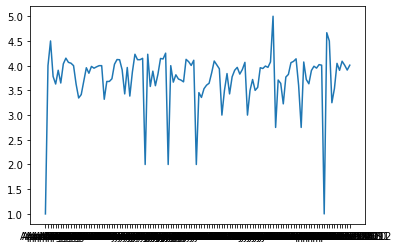

In [71]:
plt.plot(ratings_by_date)